# MINI ASSIGNMENT
### CLASSIFICATION MODEL TO PREDICT SURVIVAL RATE IN TITANIC

In [135]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [136]:
df=sns.load_dataset('titanic')
df.to_csv('Titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [137]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [138]:
df=df.drop(columns=['deck'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [139]:
# imputing missing values
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
df['age']=df['age'].fillna(df['age'].median())

In [140]:
# checking the data if has missing values or not
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [141]:
# encoding the categorical values and object values
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='object' or df[i].dtype.name=='category':
        df[i]=le.fit_transform(df[i])

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


<Axes: >

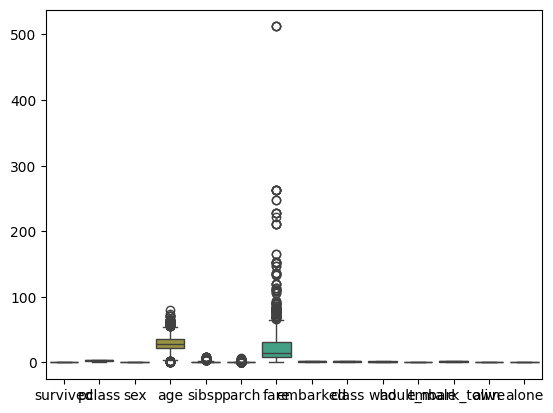

In [142]:
#checking quality of data
sns.boxplot(data=df)

In [143]:
# removing outliers using IQR(inter quartile range) method

Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]


In [144]:
# selecting features and labels
x=df.drop(['survived','alive'], axis=1)
y=df['survived']

In [145]:
# train test and split data
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [146]:
# building model
model=LogisticRegression(max_iter=200)

In [147]:
# train on feature
model.fit(x_train,y_train)

c:\Users\PMLS\anaconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [148]:
#score
t_score=model.score(x_train,y_train)
print("Score: ",t_score)

Score:  0.8161290322580645


In [149]:
# predict 
y_pred=model.predict(x_test)

In [150]:
# evaluate model
from sklearn.metrics import classification_report


print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:", confusion_matrix(y_test,y_pred))
print('Classification Report:', classification_report(y_test,y_pred))

Accuracy Score: 0.7806451612903226
Confusion Matrix: [[82 13]
 [21 39]]
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.86      0.83        95
           1       0.75      0.65      0.70        60

    accuracy                           0.78       155
   macro avg       0.77      0.76      0.76       155
weighted avg       0.78      0.78      0.78       155



## data visualization

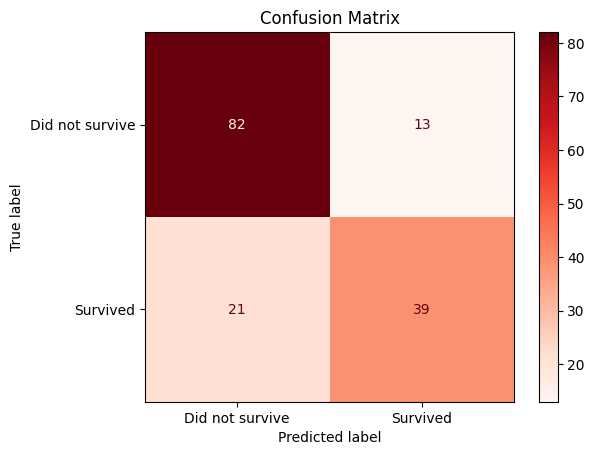

In [151]:
#confusion metrix visualization using confusion matrix display
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Did not survive", "Survived"])
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

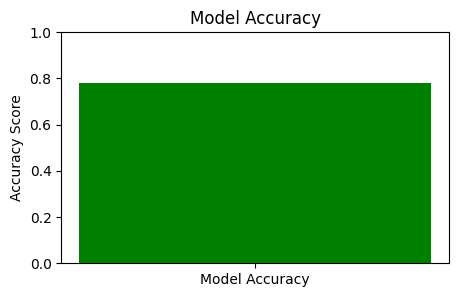

In [ ]:
# accuracy score visualization using barplot
plt.figure(figsize=(5, 3))
accuracy = accuracy_score(y_test, y_pred)
plt.bar(["Model Accuracy"], [accuracy], color='blue')
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy")
plt.show()